# Исследование данных о продаже интернет-магазина «Стримчик»

# Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нжно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и планируеи кампанию на 2017-й. Нужно отработать 
принцип работы с данными. Неважно, прогнозируем ли продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


# Описание данных

•	Name — название игры

•	Platform — платформа

•	Year_of_Release — год выпуска

•	Genre — жанр игры

•	NA_sales — продажи в Северной Америке (миллионы проданных копий)

•	EU_sales — продажи в Европе (миллионы проданных копий)

•	JP_sales — продажи в Японии (миллионы проданных копий)

•	Other_sales — продажи в других странах (миллионы проданных копий)

•	Critic_Score — оценка критиков (максимум 100)

•	User_Score — оценка пользователей (максимум 10)

•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг 
компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


# Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np
df = pd.read_csv('/datasets/games.csv')

In [2]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
df.duplicated().sum()

0

**Вывод:** 16715 записей, в некоторых данных присутствуют пропуски, явных дубликатов нет, однако требуется проверить на наличие неявных.

# Шаг 2. Подготовьте данные

## Замените названия столбцов (приведите к нижнему регистру)

In [7]:
df.columns = df.columns.str.lower()

## Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

Year_of_Release и Critic_Score требуется преобразовать.

In [8]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
df['year_of_release'] = pd.to_numeric(df['year_of_release'])
df['user_score'] = pd.to_numeric(df['user_score'], errors ='coerce')

## Обработайте пропуски при необходимости: 

Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;

Опишите причины, которые могли привести к пропускам;

Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать

Есть 2 пропуска в name и genre, 269 по годам, critic_score - 8578, user_score - 6701, rating - 6766.

In [10]:
df.dropna(subset=['name'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [12]:
df.dropna(subset=['name'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [14]:
df = df.dropna(subset=['name'])
df = df.dropna(subset=['genre'])

In [15]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Аббервиатура "tbd" означает, что игра еще не оценена достаточным количеством пользователей. Расшифровывается с ангилийского "to be defined". Пропуски по оценкам оставим, так как при удалении или замене их на медианное значение, данные могут быть неверны для анализа.
year_of_release
можем удалить, так как на анализ данных не повлияет.

In [16]:
df = df.dropna(subset=['year_of_release'])

In [17]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Аббервиатура "tbd"  можем заменить на значение NaN, так как по сути это пропуски в данных.

In [18]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

На пропусках в рейтинге можно поставить заглушку No rating

In [19]:
df['rating'] = df['rating'].fillna('No rating')

In [20]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Явных дубликатов не было, проверим на наличие неявных по имени, платформе и году выпуска.

In [21]:
df_dupl = df.loc[:, 'name':'year_of_release']
df_dupl = df_dupl[df_dupl.duplicated()].head()
df_dupl

,name,platform,year_of_release
16230,Madden NFL 13,PS3,2012.0


Есть 1 дубликат, удалим из датафрейма.

In [22]:
df = df.drop(index=[16230])

In [23]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


## Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

Создадим отдельный столбец с суммарными продажами - all_sales.

In [25]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [26]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No rating,31.38


**Вывод:** Посмотрели общую информацию по данным, подготовили данные: рассмотрели пропуски и проработали, избавились от дубликатов. Создали отдельный столбец с суммарными продажами во всех регионах.

# Шаг 3. Проведите исследовательский анализ данных

## Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [27]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


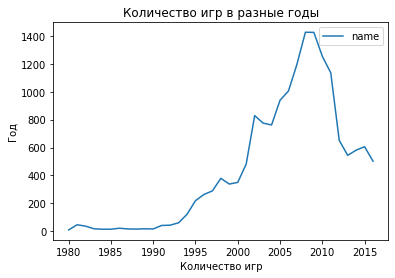

In [28]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot()
plt.title('Количество игр в разные годы')
plt.xlabel('Количество игр')
plt.ylabel('Год')
plt.show() 

**Вывод:** Можно отметить, что в выпущенных играх наблюдается пик примерно с 2005 по 2011 года. Далее пошло на спад. Видно, что именно в эти года был пик развития компьютерных игр.

## Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [29]:
df.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values('all_sales', ascending=False)

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


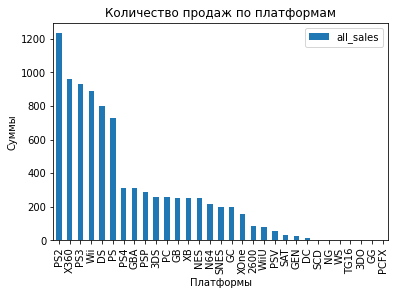

In [30]:
df.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values('all_sales', ascending=False).plot.bar()
plt.title('Количество продаж по платформам')
plt.xlabel('Платформы')
plt.ylabel('Суммы')
plt.show() 

**Вывод:** Топ-5 по количеству продаж платформ: PS2, X360, PS3, Wii, DS. Суммы продаж по каждой превышают 700.

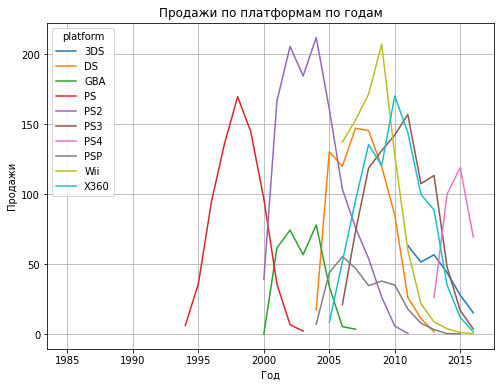

In [31]:
most_popular = df.groupby('platform').sum()['all_sales'].sort_values(ascending=False).index.values[:10]

popular_df = df[df.platform.isin(most_popular)]
popular_df = popular_df.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
popular_df.plot(figsize=(8,6))
plt.title('Продажи по платформам по годам')
plt.ylabel('Продажи')
plt.xlabel('Год')
plt.grid(True)
plt.show()

**Вывод:** Характерный срок за который появляются новые и исчезают старые платформы составляет примерно 5 лет. Продолжительность жизни платформы составляет примерно 7 лет в среднем.

In [32]:
temp = df.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

## Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Данный возьмем за период с 2013 по 2016 года.

## Не учитывайте в работе данные за предыдущие годы.

In [33]:
data = df.query('year_of_release >= 2013')

In [34]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,No rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,No rating,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No rating,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,No rating,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,No rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No rating,0.01


## Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [35]:
data.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values('all_sales', ascending=False)

,all_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


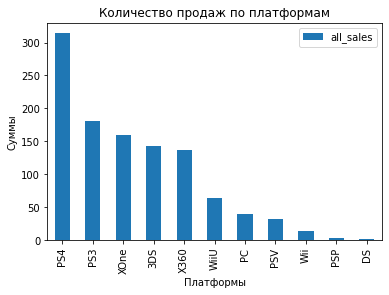

In [36]:
data.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values('all_sales', ascending=False).plot.bar()
plt.title('Количество продаж по платформам')
plt.xlabel('Платформы')
plt.ylabel('Суммы')
plt.show() 

**Вывод:** Топ-5 платформ по продажам: PS4, PS3, XOne, 3DS, X360.

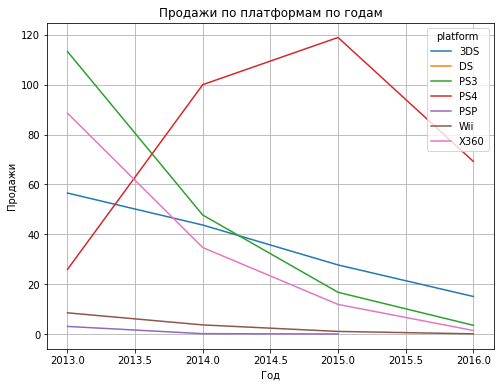

In [37]:
most_popular_actual = data.groupby('platform').sum()['all_sales'].sort_values(ascending=False).index.values[:10]

popular_data_actual = data[data.platform.isin(most_popular)]
popular_data_actual = popular_data_actual.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
popular_data_actual.plot(figsize=(8,6))
plt.title('Продажи по платформам по годам')
plt.ylabel('Продажи')
plt.xlabel('Год')
plt.grid(True)
plt.show()

**Вывод:** по графику можем отметить, что продажи идут на спад. У PS4 явно выраженный резкий спад в 2015 году.

## Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат

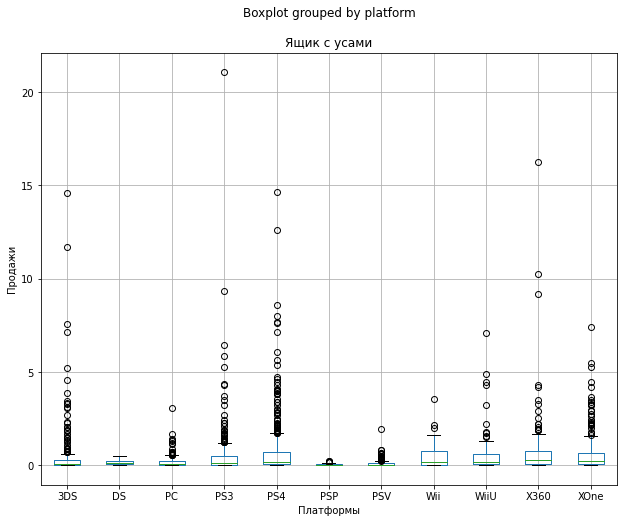

In [38]:
data.boxplot(by = 'platform', column='all_sales', figsize=(10,8))
plt.title('Ящик с усами')
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.grid(True)
plt.show()

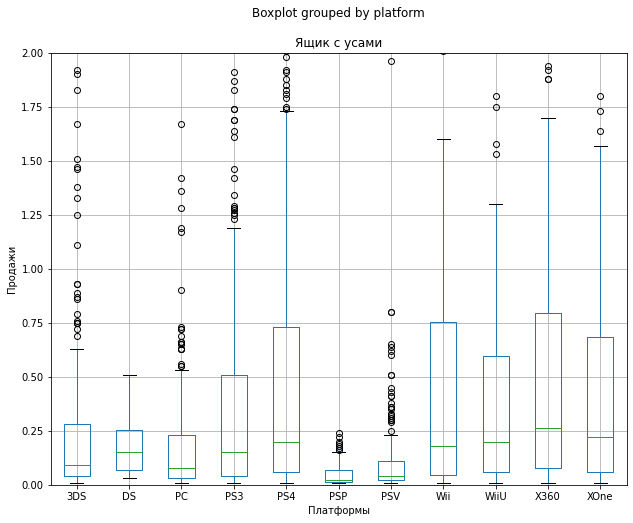

In [39]:
data.boxplot(by = 'platform', column='all_sales', figsize=(10,8))
plt.title('Ящик с усами')
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.grid(True)
plt.ylim(0, 2)
plt.show()

**Вывод:** По графику можем увидеть немалое количество выбросов в данных. Стабильно высокие продажи можно отметить у платформ PS4, X360, XOne, PS3.

## Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [40]:
data_PS4 = data.query('platform == "PS4"')

In [41]:
data_PS4 = data_PS4.loc[:, ['critic_score', 'user_score', 'all_sales']]

In [42]:
data_PS4.corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
all_sales,0.406568,-0.031957,1.000000


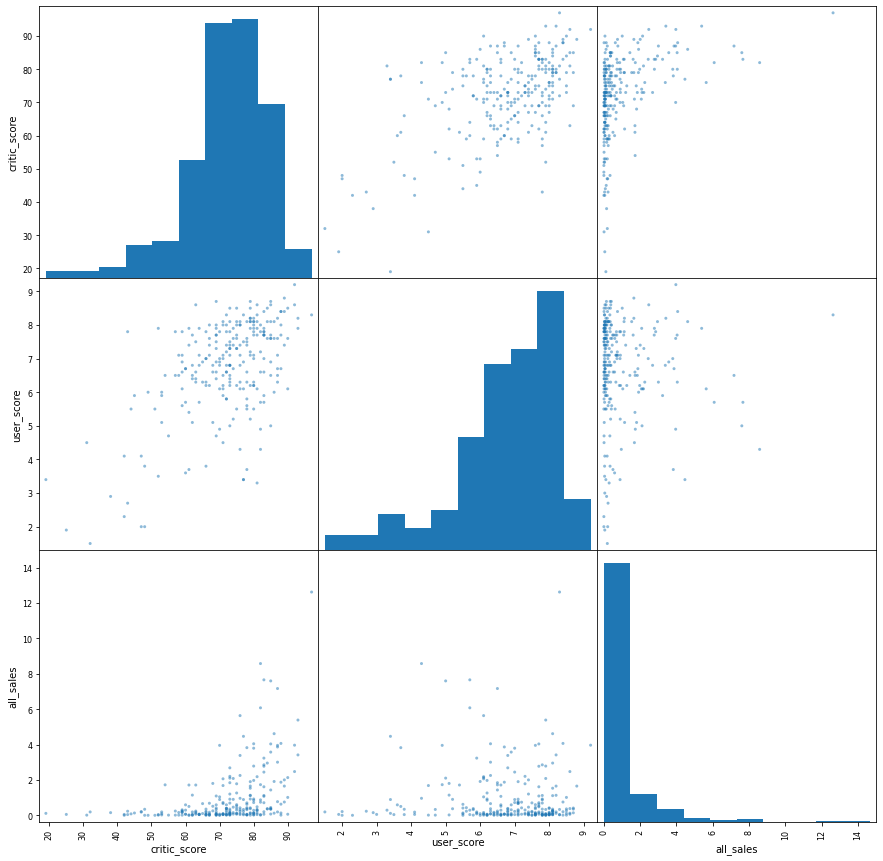

In [43]:
pd.plotting.scatter_matrix(data_PS4, figsize=(15, 15))
plt.show()

**Вывод:** По PS4 корреляция между продажами и оценкой критиков равна 0.4. Между оценкой пользователей и продажами - -0.03. Корреляция между оценкой критиков и оценкой пользователей - 0.56.

In [44]:
data_X360 = data.query('platform == "X360"')
data_X360 = data_X360.loc[:, ['critic_score', 'user_score', 'all_sales']]

In [45]:
data_X360.corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.520946,0.350345
user_score,0.520946,1.000000,-0.011742
all_sales,0.350345,-0.011742,1.000000


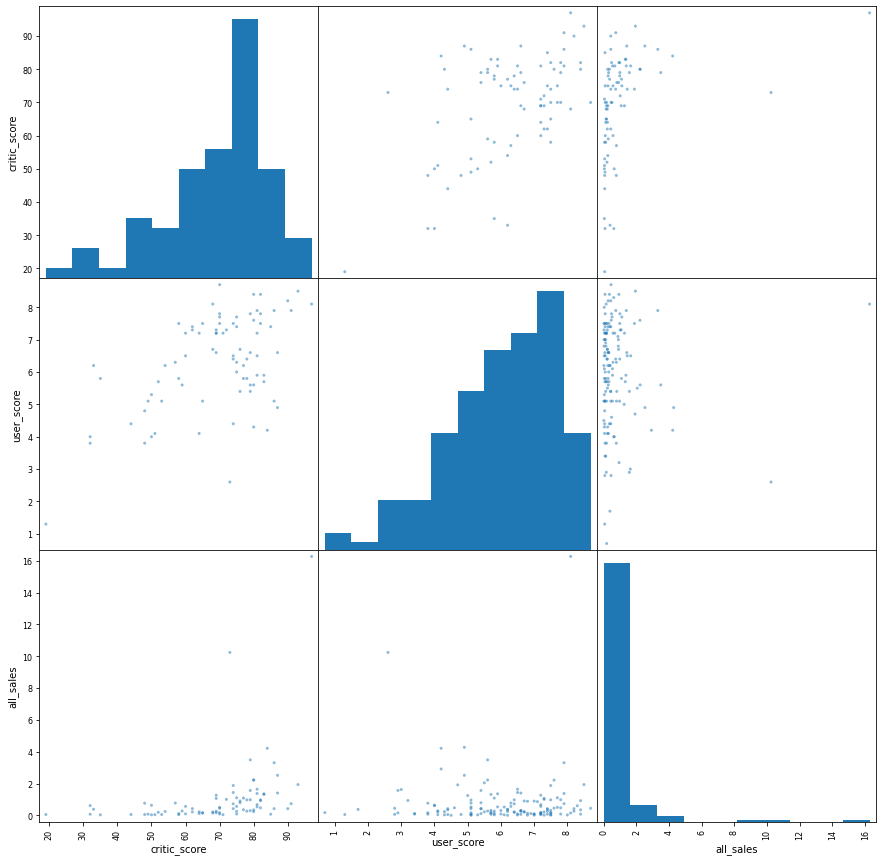

In [46]:
pd.plotting.scatter_matrix(data_X360, figsize=(15, 15))
plt.show()

**Вывод:** По X360 корреляция между продажами и оценкой критиков равна 0.35. Между оценкой пользователей и продажами - -0.01. Корреляция между оценкой критиков и оценкой пользователей - 0.52.

In [49]:
data_XOne = data.query('platform == "XOne"')
data_XOne = data_XOne.loc[:, ['critic_score', 'user_score', 'all_sales']]

In [50]:
data_XOne.corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
all_sales,0.416998,-0.068925,1.000000


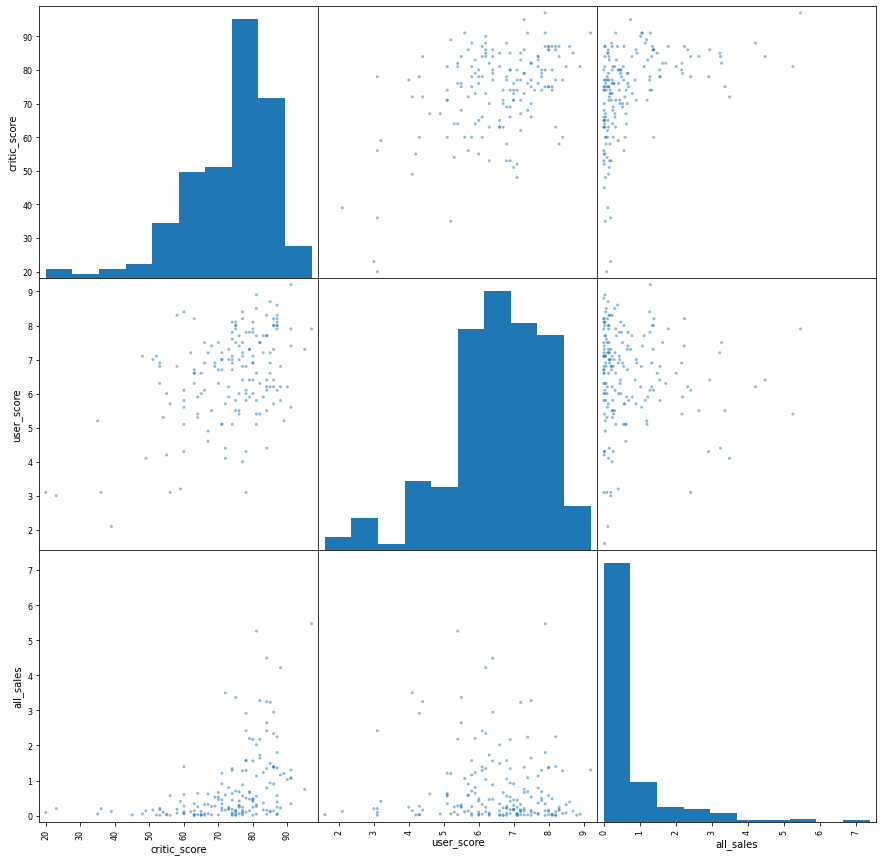

In [51]:
pd.plotting.scatter_matrix(data_XOne, figsize=(15, 15))
plt.show()

**Вывод:** По XOne корреляция между продажами и оценкой критиков равна 0.416. Между оценкой пользователей и продажами - -0.068. Корреляция между оценкой критиков и оценкой пользователей - 0.47.

In [52]:
data_PS3 = data.query('platform == "PS3"')
data_PS3 = data_PS3.loc[:, ['critic_score', 'user_score', 'all_sales']]

In [53]:
data_PS3.corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.599920,0.334285
user_score,0.599920,1.000000,0.002394
all_sales,0.334285,0.002394,1.000000


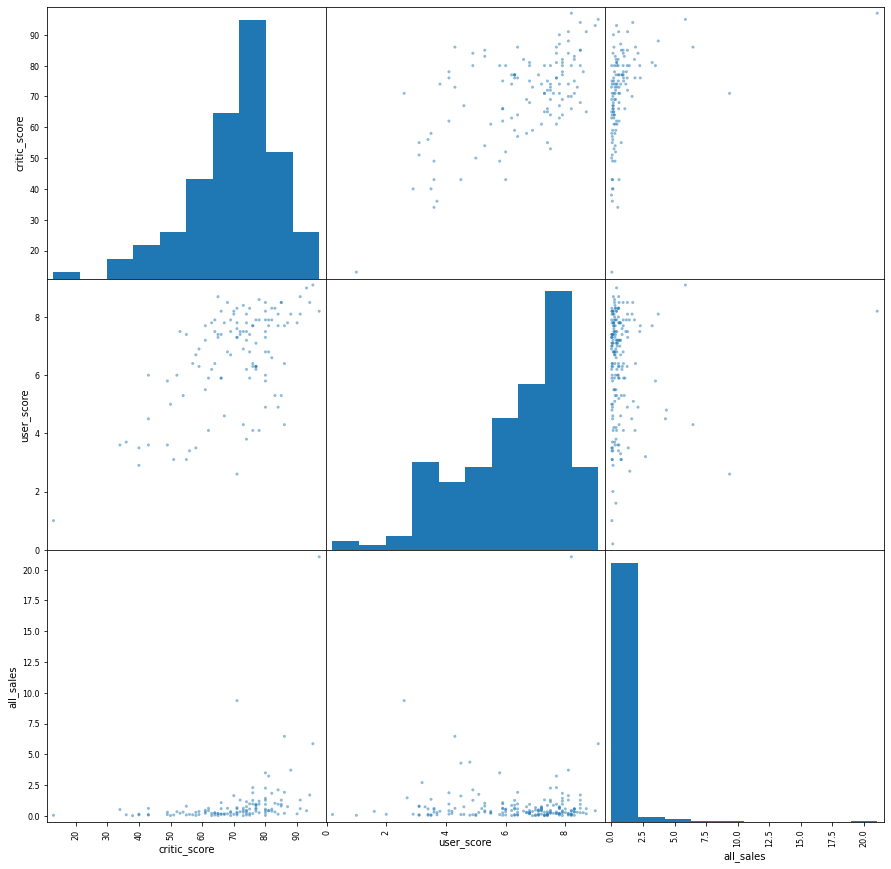

In [54]:
pd.plotting.scatter_matrix(data_PS3, figsize=(15, 15))
plt.show()

**Вывод:** По PS3 корреляция между продажами и оценкой критиков равна 0.33. Между оценкой пользователей и продажами - 0.002. Корреляция между оценкой критиков и оценкой пользователей - 0.59.

## Соотнесите выводы с продажами игр на других платформах.

**Вывод:** Можем отметить, что присутствует прямая зависимость между оценку пользователей и оценкой критиков. Чем выше 1 оценка, тем выше вторая. Между оценкой пользователей корреляция в большей степени отрицательная. Чем выше 1 показатель, тем ниже второй. В случае корреляции между продажами и оценкой критиков корреляции положительные. Есть прямая зависимость.

## Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [59]:
data.pivot_table(index='genre', values='all_sales', aggfunc='sum').sort_values(by = 'all_sales', ascending=False)

,all_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


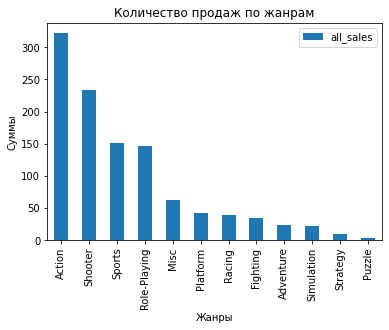

In [62]:
data.pivot_table(index='genre', values='all_sales', aggfunc='sum').sort_values(by = 'all_sales', ascending=False).plot.bar()
plt.title('Количество продаж по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Суммы')
plt.show() 

Посмотрим данные по медианне

In [63]:
data.pivot_table(index='genre', values='all_sales', aggfunc='median').sort_values(by = 'all_sales', ascending=False)

,all_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


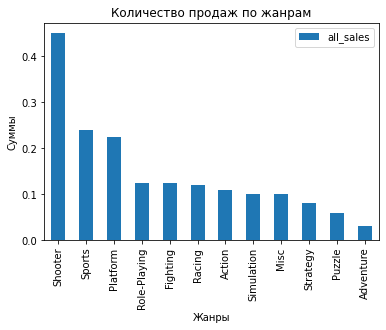

In [64]:
data.pivot_table(index='genre', values='all_sales', aggfunc='median').sort_values(by = 'all_sales', ascending=False).plot.bar()
plt.title('Количество продаж по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Суммы')
plt.show() 

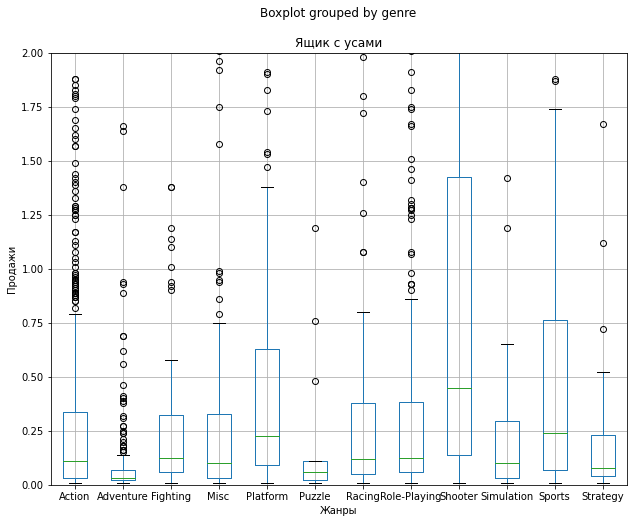

In [67]:
data.boxplot(by='genre', column='all_sales', figsize=(10,8))
plt.ylim(0, 2)
plt.title('Ящик с усами')
plt.ylabel('Продажи')
plt.xlabel('Жанры')
plt.show()

**Вывод:** Рассмотрев данные по распределению медианных значений по прибыли жанров можно отметить, что топ по продажам являются шутеры, спорт и платформ игры. Шутеры занимают наибольшую часть, в два раза больше чем жанр спорта.

**Вывод:**
Можно отметить, что в выпущенных играх наблюдается пик примерно с 2005 по 2011 года. Далее пошло на спад. Видно, что именно в эти года был пик развития компьютерных игр.

Топ-5 по количеству продаж платформ: PS2, X360, PS3, Wii, DS. Суммы продаж по каждой превышают 700.

Характерный срок за который появляются новые и исчезают старые платформы составляет примерно 5 лет. Продолжительность жизни платформы составляет примерно 7 лет в среднем.

Данный возьмем за период с 2013 по 2016 года.

Топ-5 платформ по продажам: PS4, PS3, XOne, 3DS, X360.

По графику можем отметить, что продажи идут на спад. У PS4 явно выраженный резкий спад в 2015 году.

По графику можем увидеть немалое количество выбросов в данных. Стабильно высокие продажи можно отметить у платформ PS4, X360, XOne, PS3.

Можем отметить, что присутствует прямая зависимость между оценку пользователей и оценкой критиков. Чем выше 1 оценка, тем выше вторая. Между оценкой пользователей корреляция в большей степени отрицательная. Чем выше 1 показатель, тем ниже второй. В случае корреляции между продажами и оценкой критиков корреляции положительные. Есть прямая зависимость.

Рассмотрев данные по распределению медианных значений по прибыли жанров можно отметить, что топ по продажам являются шутеры, спорт и платформ игры. Шутеры занимают наибольшую часть, в два раза больше чем жанр спорта.

# Шаг 4. Составьте портрет пользователя каждого региона

## Определите для пользователя каждого региона (NA, EU, JP):
•	Самые популярные платформы (топ-5). Опишите различия в долях продаж.

•	Самые популярные жанры (топ-5). Поясните разницу.

•	Влияет ли рейтинг ESRB на продажи в отдельном регионе

In [68]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,No rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,No rating,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [69]:
na_data = data.query('na_sales > 0')

In [70]:
eu_data = data.query('eu_sales > 0')

In [71]:
jp_data = data.query('jp_sales > 0')

### Регион NA

In [72]:
na_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,No rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,No rating,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [74]:
na_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


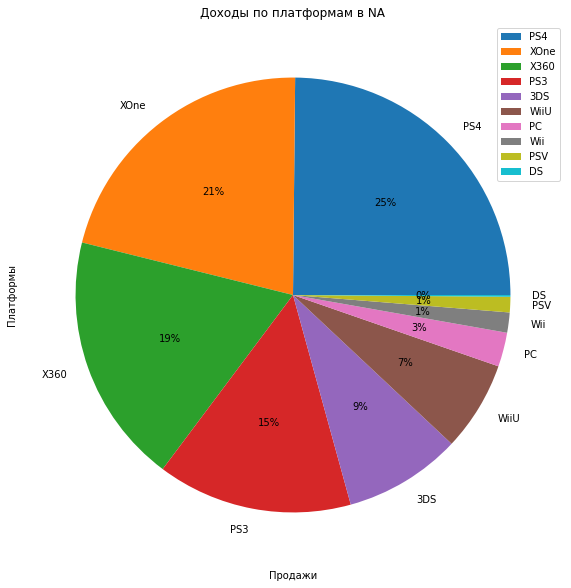

In [75]:
na_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).plot.pie(y='na_sales', figsize=(10,10), autopct = '%1.0f%%', title = 'Процентное соотношение пользователей в зависимости от тарифа')
plt.title('Доходы по платформам в NA')
plt.ylabel('Платформы')
plt.xlabel('Продажи')
plt.show()

**Вывод:** Топ-5 платформ в регионе NA являются PS4, XOne, X360, PS3, 3DS.

In [76]:
na_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


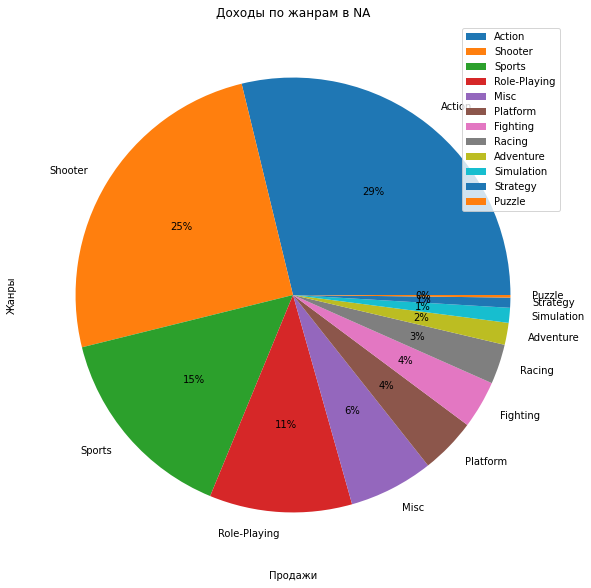

In [88]:
na_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).plot.pie(y='na_sales', figsize=(10,10), autopct = '%1.0f%%', title = 'Процентное соотношение пользователей в зависимости от тарифа')
plt.title('Доходы по жанрам в NA')
plt.ylabel('Жанры')
plt.xlabel('Продажи')
plt.show()

**Вывод:** Топ-5 жанров в регионе NA: экшн, шутер, спорт, ролевые игры, микс.

In [78]:
na_data.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

,na_sales
rating,
M,165.21
No rating,89.42
E,79.05
E10+,54.24
T,49.79


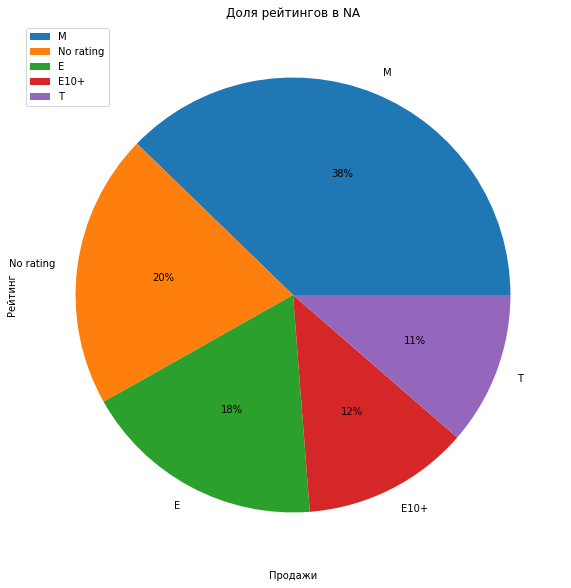

In [80]:
na_data.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).plot.pie(y='na_sales', figsize=(10,10), autopct = '%1.0f%%', title = 'Процентное соотношение пользователей в зависимости от тарифа')
plt.title('Доля рейтингов в NA')
plt.ylabel('Рейтинг')
plt.xlabel('Продажи')
plt.show()

**Вывод:** Большую долю занимает рейтинг M - 38%, буз рейтинга - 20%.

### Регион EU

In [81]:
eu_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,No rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,No rating,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [83]:
eu_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10
Wii,5.93


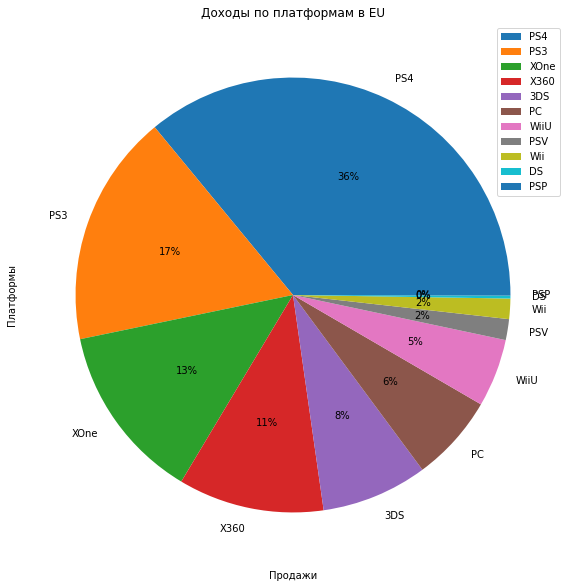

In [85]:
eu_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).plot.pie(y='eu_sales', figsize=(10,10), autopct = '%1.0f%%', title = 'Процентное соотношение пользователей в зависимости от тарифа')
plt.title('Доходы по платформам в EU')
plt.ylabel('Платформы')
plt.xlabel('Продажи')
plt.show()

**Вывод:** Топ 5 платформ по продажам в регионе EU, PS4, PS3, XOne X360. 

In [86]:
eu_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


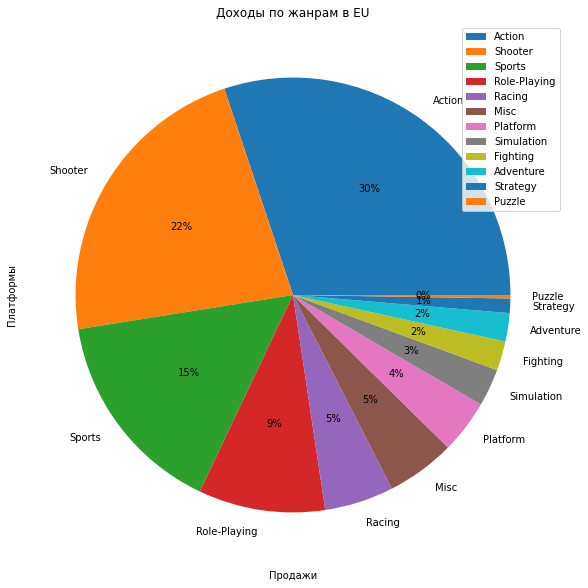

In [87]:
eu_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).plot.pie(y='eu_sales', figsize=(10,10), autopct = '%1.0f%%', title = 'Процентное соотношение пользователей в зависимости от тарифа')
plt.title('Доходы по жанрам в EU')
plt.ylabel('Платформы')
plt.xlabel('Продажи')
plt.show()

**Вывод:** Топ 5 жанров по продажам в EU: экшн, шутер, спорт, ролевые игры, рэйсинг.

In [89]:
eu_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

,eu_sales
rating,
M,145.32
E,83.36
No rating,78.91
E10+,42.69
T,41.95


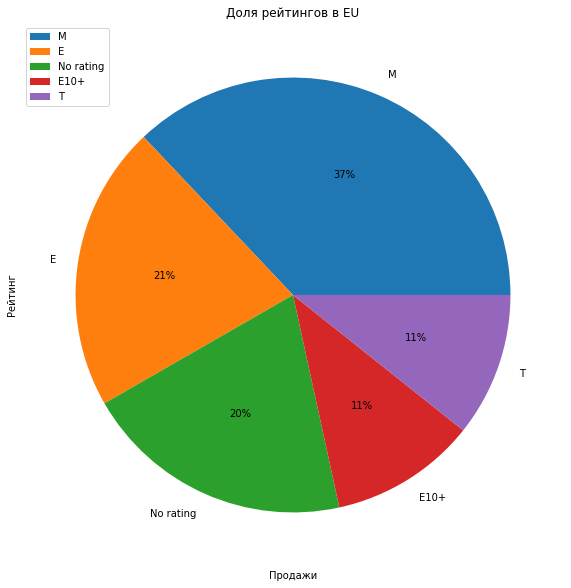

In [91]:
eu_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).plot.pie(y='eu_sales', figsize=(10,10), autopct = '%1.0f%%', title = 'Процентное соотношение пользователей в зависимости от тарифа')
plt.title('Доля рейтингов в EU')
plt.ylabel('Рейтинг')
plt.xlabel('Продажи')
plt.show()

**Вывод:** Доля рейтингов в регионе EU: M - 37%, E - 21%, без рейтинга - 20%.

### Регион JP

In [92]:
jp_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,No rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,No rating,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [93]:
jp_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
PSP,3.29
X360,0.51
XOne,0.34
Wii,0.05


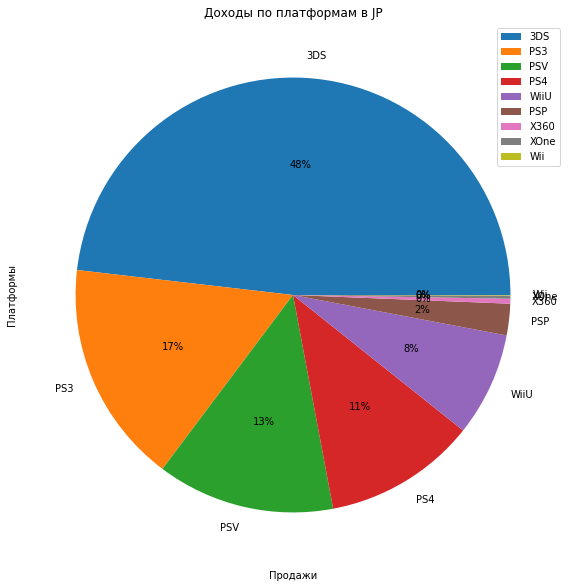

In [95]:
jp_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).plot.pie(y='jp_sales', figsize=(10,10), autopct = '%1.0f%%', title = 'Процентное соотношение пользователей в зависимости от тарифа')
plt.title('Доходы по платформам в JP')
plt.ylabel('Платформы')
plt.xlabel('Продажи')
plt.show()

**Вывод:** Топ 5 платформ в регионе JP: 3DS, PS3, PSV, PS4, WiiU.

In [96]:
jp_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


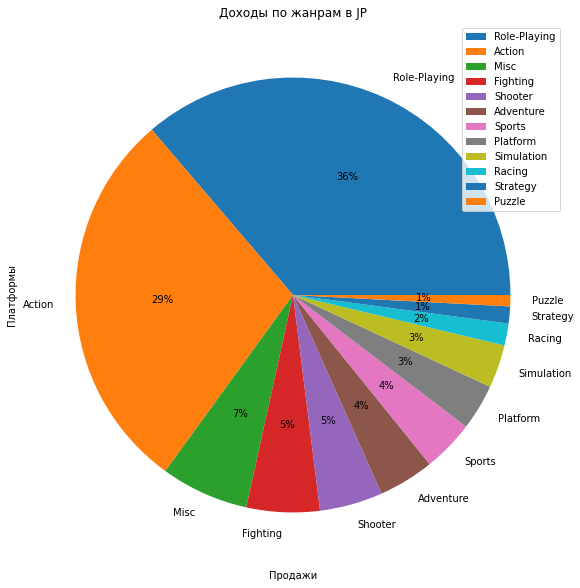

In [97]:
jp_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).plot.pie(y='jp_sales', figsize=(10,10), autopct = '%1.0f%%', title = 'Процентное соотношение пользователей в зависимости от тарифа')
plt.title('Доходы по жанрам в JP')
plt.ylabel('Платформы')
plt.xlabel('Продажи')
plt.show()

**Вывод:** Топ 5 жанров по JP: ролевые игры, экшн, микс, файтинг, шутер.

In [98]:
jp_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

,jp_sales
rating,
No rating,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


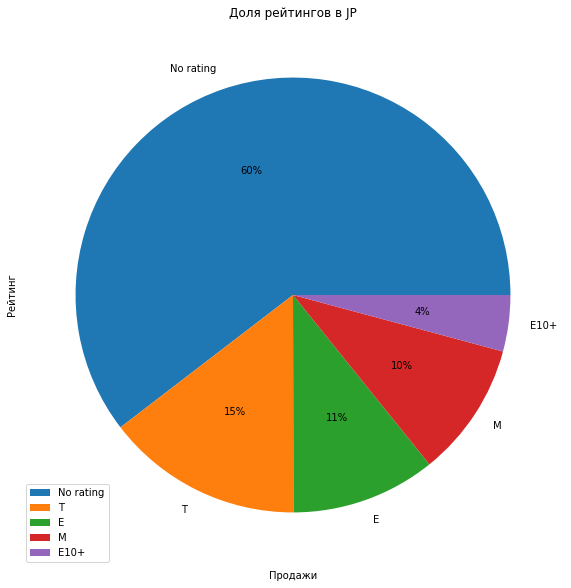

In [99]:
jp_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).plot.pie(y='jp_sales', figsize=(10,10), autopct = '%1.0f%%', title = 'Процентное соотношение пользователей в зависимости от тарифа')
plt.title('Доля рейтингов в JP')
plt.ylabel('Рейтинг')
plt.xlabel('Продажи')
plt.show()

**Вывод:** Доля рейтингов в регионе JP: без рейтинга - 60%, T - 15%, E - 11%. Такие данные за счет того, что рейтинг ERSB заполняется для игр США и Канады. Соответсвенно, в других регионах он не заполняется.

**Вывод:** Общий портрег игрока по регионам:

NA:
1. Платформа PS4 или XOne
2. Жанр экшн или шутер
3. Рейтинг M или без рейтинга: 17+

EU:
1. Платформа PS4 или PS3
2. Жанр экшн или шутер
3. Рейтинг M (17+) или E

JP:
1. Платформа 3DS или PS3
2. Жанр ролевые игры или экшн
3. Рейтинг без рейтинга или T (13+)


Можно отметить совпадения по жанрам или платформам. Однако отличия региона JP наиболее ярко выражены.

# Шаг 5. Проверьте гипотезы

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H_0 (нулевая гипотеза): Средние пользовательские рейтинги платформ Xbox One и PC равны

H_1 (альтернативная гипотеза): Средние пользовательские рейтинги платформ Xbox One и PC не равны

In [108]:
a = data.loc[data['platform']=='XOne'].user_score.dropna().values
b = data.loc[data['platform']=='PC'].user_score.dropna().values

alpha = 0.05

results = st.ttest_ind(a, b, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.07006329201805823
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Не получилось отвергнуть нулевую гипотезу. Значит можно предполагать, что средние пользовательские рейтинги платформ Xbox One и PC могут быть равны.

## Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H_0 (нулевая гипотеза): Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны

H_1 (альтернативная гипотеза): Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [109]:
a = data.loc[data['genre']=='Action'].user_score.dropna().values
b = data.loc[data['genre']=='Sports'].user_score.dropna().values

alpha = 0.05

results = st.ttest_ind(a, b, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 5.2589161945700115e-28
Отвергаем нулевую гипотезу


**Вывод:** Отвергаем нулевую гипотезу. Значит можно предполагать, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Как вы сформулировали нулевую и альтернативную гипотезы; Какой критерий применили для проверки гипотез и почему.


Правила формулирования нулевой и альтернативной гипотез:
- Нулевая гипотеза (H0) - это предположение о том, что нет различий между средними значениями двух выборок. В случае t-теста, нулевая гипотеза утверждает, что среднее значение разницы между двумя выборками равно нулю.
- Альтернативная гипотеза (H1) - это противоположное предположение о том, что существуют различия между средними значениями двух выборок. В t-тесте альтернативная гипотеза утверждает, что среднее значение разницы между двумя выборками не равно нулю.

Использование t-теста имеет определенные ограничения, которые необходимо учитывать при его применении:
- Нормальное распределение данных: t-тест предполагает, что данные имеют нормальное распределение. Если данные не соответствуют этому предположению, то результаты теста могут быть недостоверными. При выборках более 30 значений нормальность выборки не важна, с учетом того, что в реальных бизнес-процессах нормального распределения данных ни когда не бывает.
- Равномерное распределение данных в каждой группе: t-тест предназначен для сравнения средних значений двух независимых выборок. Поэтому важно, чтобы в каждой группе (выборке) было достаточное количество наблюдений и они были равномерно распределены.
- Независимость выборок: t-тест предполагает, что выборки, которые сравниваются, являются независимыми. Если наблюдения в одной выборке зависят от наблюдений в другой выборке (например, в случае последовательных временных точек), то необходимо использовать другие статистические методы.
- Достаточно большой размер выборки: для получения достоверных результатов t-теста необходимо, чтобы размер каждой выборки был достаточно большим. Минимальные требования к размеру выборки зависят от уровня значимости.
- Отсутствие выбросов: t-тест чувствителен к выбросам в данных, поэтому важно убедиться, что в данных нет экстремальных значений, которые могут исказить результаты.
- Однородность дисперсий: t-тест предполагает, что дисперсии (разбросы) данных в каждой выборке примерно одинаковы. Если это не так, то следует использовать параметр `equal_var` равным `False`.

# Шаг 6. Напишите общий вывод

Посмотрели общую информацию по данным, подготовили данные: рассмотрели пропуски и проработали, избавились от дубликатов. Создали отдельный столбец с суммарными продажами во всех регионах.

Можно отметить, что в выпущенных играх наблюдается пик примерно с 2005 по 2011 года. Далее пошло на спад. Видно, что именно в эти года был пик развития компьютерных игр.

Топ-5 по количеству продаж платформ: PS2, X360, PS3, Wii, DS. Суммы продаж по каждой превышают 700.

Характерный срок за который появляются новые и исчезают старые платформы составляет примерно 5 лет. Продолжительность жизни платформы составляет примерно 7 лет в среднем.

Данный возьмем за период с 2013 по 2016 года.

Топ-5 платформ по продажам: PS4, PS3, XOne, 3DS, X360.

По графику можем отметить, что продажи идут на спад. У PS4 явно выраженный резкий спад в 2015 году.

По графику можем увидеть немалое количество выбросов в данных. Стабильно высокие продажи можно отметить у платформ PS4, X360, XOne, PS3.

Можем отметить, что присутствует прямая зависимость между оценку пользователей и оценкой критиков. Чем выше 1 оценка, тем выше вторая. Между оценкой пользователей корреляция в большей степени отрицательная. Чем выше 1 показатель, тем ниже второй. В случае корреляции между продажами и оценкой критиков корреляции положительные. Есть прямая зависимость.
Рассмотрев данные по распределению медианных значений по прибыли жанров можно отметить, что топ по продажам являются шутеры, спорт и платформ игры. Шутеры занимают наибольшую часть, в два раза больше чем жанр спорта.

Общий портрег игрока по регионам:

NA:

1.	Платформа PS4 или XOne
2.	Жанр экшн или шутер
3.	Рейтинг M или без рейтинга: 17+

EU:

1.	Платформа PS4 или PS3
2.	Жанр экшн или шутер
3.	Рейтинг M (17+) или E

JP:

1.	Платформа 3DS или PS3
2.	Жанр ролевые игры или экшн
3.	Рейтинг без рейтинга или T (13+)
Можно отметить совпадения по жанрам или платформам. Однако отличия региона JP наиболее ярко выражены.

По гипотезам:

Можно предполагать, что средние пользовательские рейтинги платформ Xbox One и PC могут быть равны.

Можно предполагать, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


На какие игры стоить тратить рекламный бюджет:

в NA экшн, платформа PS4

в EU экшн, платформа PS4

в JP рол. игры, 3DS